## **Gráfico Coroplético: Distribución del Porcentaje de Pobreza por Ingresos en las Regiones de Chile (2022)**


### **IMPORTACIÓN DE LIBRERÍAS**

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.patches as patches

### **CARGAR EL ARCHIVO SHAPEFILE**

In [2]:
shapefile_path = './geodata/REGIONES_2020.shp'
gdf = gpd.read_file(shapefile_path)

### **CANTIDAD DE FILAS DE GEODATAFRAME**

In [3]:
print(gdf.count())

CUT_REG       16
REGION        16
SUPERFICIE    16
geometry      16
dtype: int64


### **VERIFICAR LAS PRIMERAS FILAS DEL GEODATAFRAME**

In [4]:
print(gdf.head(16))

   CUT_REG                                     REGION  SUPERFICIE  \
0       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
1       07                                      Maule    30321.08   
2       02                                Antofagasta   126066.54   
3       09                               La Araucanía    31811.89   
4       12       Magallanes y de la Antártica Chilena   130482.00   
5       06      Libertador General Bernardo O'Higgins    16347.03   
6       03                                    Atacama    75650.08   
7       05                                 Valparaíso    16240.50   
8       10                                  Los Lagos    48372.46   
9       08                                     Biobío    23996.18   
10      01                                   Tarapacá    42288.81   
11      13                  Metropolitana de Santiago    15401.94   
12      14                                   Los Ríos    18324.18   
13      15                        

### **VERIFICAR LOS NOMBRES DE LAS COLUMNAS DEL GEODATAFRAME**

In [5]:
print(gdf.columns)

Index(['CUT_REG', 'REGION', 'SUPERFICIE', 'geometry'], dtype='object')


### **CARGAR DATAFRAME FUSIONADO**

In [6]:
df_merge = pd.read_csv('./data/df_merge_preliminar.csv')

### **DICCIONARIO PARA REEMPLAZAR LOS NOMBRES DE REGIONES**

In [7]:
reemplazos_regiones = {
    'Tarapacá': 'Tarapacá',
    'Antofagasta': 'Antofagasta',
    'Atacama': 'Atacama',
    'Coquimbo': 'Coquimbo',
    'Valparaíso': 'Valparaíso',
    'O\'Higgins': 'Libertador General Bernardo O\'Higgins',
    'Maule': 'Maule',
    'Biobío': 'Biobío',
    'La Araucanía': 'La Araucanía',
    'Los Lagos': 'Los Lagos',
    'Aysén': 'Aysén del General Carlos Ibáñez del Campo',
    'Magallanes': 'Magallanes y de la Antártica Chilena',
    'Metropolitana': 'Metropolitana de Santiago',
    'Los Ríos': 'Los Ríos',
    'Arica y Parinacota': 'Arica y Parinacota',
    'Ñuble': 'Ñuble'
}

### **REEMPLAZAR LOS NOMBRES DE LAS REGIONES EN EL DATAFRAME**

In [8]:
df_merge['region'] = df_merge['region'].replace(reemplazos_regiones)

### **FUSIONAR EL SHAPEFILE CON EL DATAFRAME**

In [9]:
# Se fusiona por la columna 'REGION' en el shapefile y 'region' en el dataframe
gdf_merge = gdf.merge(df_merge, left_on='REGION', right_on='region', how='left')

In [10]:
# Verificar que los datos se hayan fusionado correctamente
print(gdf_merge.head(16))

   CUT_REG                                     REGION  SUPERFICIE  \
0       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
1       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
2       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
3       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
4       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
5       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
6       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
7       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
8       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
9       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
10      07                                      Maule    30321.08   
11      07                                      Maule    30321.08   
12      07                                      Maule    30321.08   
13      07                        

In [11]:
# Verificar el CRS actual y reproyecta a UTM zone 19S (Chile)
gdf_merge_projected = gdf_merge.to_crs(epsg=32719)  # UTM zone 19S

### **PERSONALIZACIÓN DEL GRÁFICO**

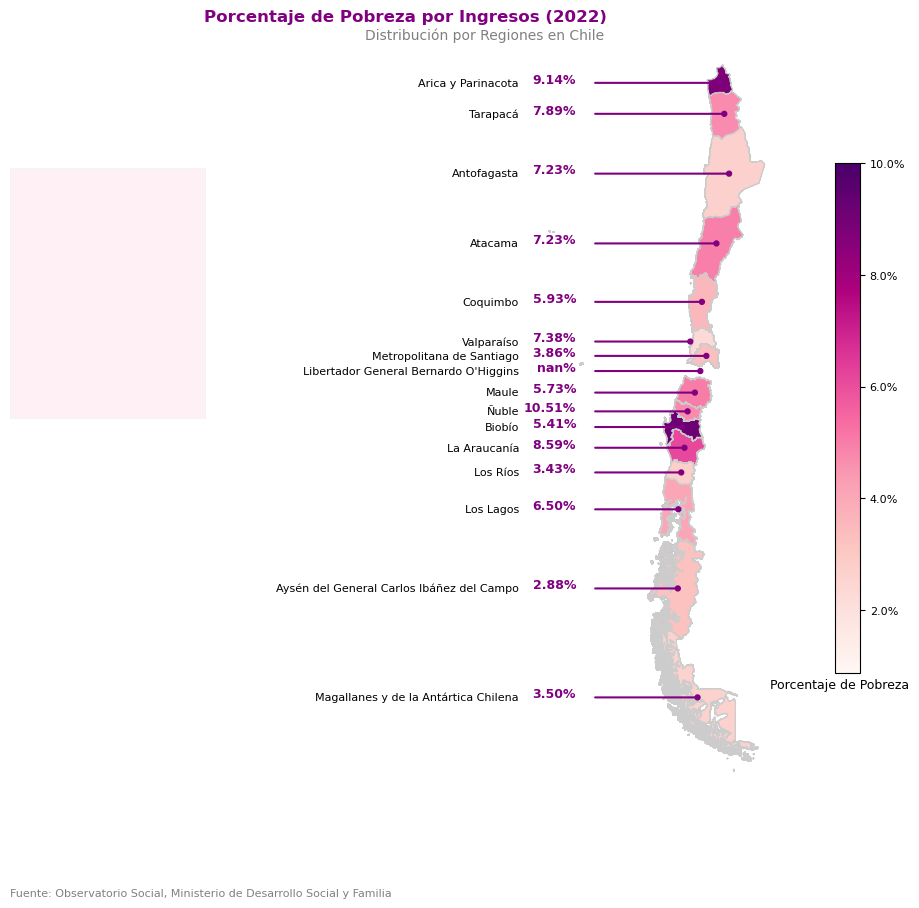

In [18]:
# Crear el gráfico geográfico
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Ajustar el rango del colormap a valores cercanos al 10%
vmin = gdf_merge['porcentaje_pobreza_por_ingresos_2022'].min()
vmax = 0.10  # Establecer 10% como el máximo para los colores más oscuros

# Plotear las regiones y colorear según el porcentaje de pobreza por ingresos
plot = gdf_merge_projected.plot(column='porcentaje_pobreza_por_ingresos_2022', 
                                cmap='RdPu', 
                                linewidth=0.8, 
                                ax=ax, 
                                edgecolor='0.8', 
                                legend=False)

# Crear manualmente la barra de color y ajustarla al nuevo rango
cbar = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(cbar, ax=ax, fraction=0.03, pad=0.04)

# Ajustar las etiquetas de la barra de color al formato de porcentaje
cbar.ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))  # Etiquetas de la barra de color como porcentaje
cbar.ax.tick_params(labelsize=8)

# Etiqueta para la barra de color
fig.text(0.88, 0.24, 'Porcentaje de Pobreza', ha='center', va='top', fontsize=9, color='black')

# Eliminar los ejes
ax.set_xticks([])
ax.set_yticks([])

# Eliminar el borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas de porcentaje con líneas horizontales hacia la izquierda para las 16 regiones
manual_labels = {
    'Arica y Parinacota': {'pos': (-350000, 7800000)},
    'Tarapacá': {'pos': (-350000, 7600000)},
    'Antofagasta': {'pos': (-350000, 7400000)},
    'Atacama': {'pos': (-350000, 7200000)},
    'Coquimbo': {'pos': (-350000, 7050000)},
    'Valparaíso': {'pos': (-350000, 6800000)},
    'Libertador General Bernardo O\'Higgins': {'pos': (-350000, 6650000)},
    'Maule': {'pos': (-350000, 6500000)},
    'Biobío': {'pos': (-350000, 6400000)},
    'La Araucanía': {'pos': (-350000, 6200000)},
    'Los Ríos': {'pos': (-350000, 6000000)},
    'Los Lagos': {'pos': (-350000, 5800000)},
    'Aysén del General Carlos Ibáñez del Campo': {'pos': (-350000, 5600000)},
    'Magallanes y de la Antártica Chilena': {'pos': (-350000, 5400000)},
    'Metropolitana de Santiago': {'pos': (-350000, 6600000)},
    'Ñuble': {'pos': (-350000, 6300000)}
}


# Etiquetas con flechas horizontales y porcentaje obtenido del dataframe
for region, data in manual_labels.items():
    # Centroides de las regiones para posicionar las flechas
    region_centroid = gdf_merge_projected.loc[gdf_merge_projected['REGION'] == region].geometry.centroid
    centroid_x = region_centroid.x.values[0]
    centroid_y = region_centroid.y.values[0]

    # Obtener el porcentaje de pobreza directamente del dataframe
    porcentaje_pobreza = gdf_merge_projected.loc[gdf_merge_projected['REGION'] == region, 'porcentaje_pobreza_por_ingresos_2022'].values[0]

    # Dibujar la línea usando FancyArrowPatch sin punta
    arrow = mpatches.FancyArrowPatch((data['pos'][0], centroid_y), (centroid_x, centroid_y), 
                                     connectionstyle="arc3,rad=0.0", color='purple', lw=1.5, 
                                     arrowstyle="-")  # Línea recta sin punta
    ax.add_patch(arrow)

    # Agregar un pequeño círculo al final de la flecha
    circle = plt.Circle((centroid_x, centroid_y), 15000, color='purple', fill=True)  # Ajusta el tamaño del círculo
    ax.add_patch(circle)

    # Añadir la etiqueta del porcentaje con tamaño 9
    ax.text(data['pos'][0] - 100000, centroid_y, f'{porcentaje_pobreza:.2%}', 
            fontsize=9, color='purple', weight='bold', ha='right')

    # Añadir la etiqueta del nombre de la región con tamaño 8, más a la izquierda
    ax.text(data['pos'][0] - 450000, centroid_y, f'{region}',  # Mover la etiqueta de región más a la izquierda
            fontsize=8, color='black', ha='right', va='center')

# Crea el rectángulo gris normal y colocar el texto encima 
rect = patches.Rectangle((0.05, 0.5), 0.195, 0.25, transform=fig.transFigure, linewidth=0.5, edgecolor='#ebf2f5', facecolor='lavenderblush', zorder=10)
fig.patches.append(rect) 
    
# Título
ax.set_title('Porcentaje de Pobreza por Ingresos (2022)', 
             fontsize=12, weight='bold', color='purple')

# Subtítulo centrado en la parte superior de la figura
fig.suptitle('Distribución por Regiones en Chile', fontsize=10, weight='light', color='gray', x=0.525, y=0.89, ha='center')

# Texto pequeño en la parte inferior izquierda
fig.text(0.05, 0.02, 'Fuente: Observatorio Social, Ministerio de Desarrollo Social y Familia', 
         ha='left', va='bottom', fontsize=8, color='gray')

# Eliminar los márgenes alrededor del mapa
plt.subplots_adjust(left=0.05, right=0.9, top=0.95, bottom=0.05)
plt.show()
